# Learn to play Pong with a Deep Q-Network (DQN)

Train an agent that can play the game Pong for Atari 2600 using the REINFORCE algorithm, which is a Policy Gradient Method.

### 1. Import Packages

In [1]:
from dqn.pong_environment import PongFromFeatures
from dqn.dqn_agent import Agent

import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

In [2]:
env = PongFromFeatures(False)
env.seed(0)

print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/home/ale/dev/pong/DLMAIRIL01/iu_rl/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(


State shape:  (12,)
Number of actions:  3


### 3. Train the Agent

Episode 100	Average Score: -20.11
Episode 200	Average Score: -19.36
Episode 300	Average Score: -18.75
Episode 400	Average Score: -17.92
Episode 500	Average Score: -17.28
Episode 600	Average Score: -16.64
Episode 700	Average Score: -15.99
Episode 800	Average Score: -15.36
Episode 900	Average Score: -14.74
Episode 1000	Average Score: -13.93
Episode 1100	Average Score: -13.65
Episode 1200	Average Score: -12.72
Episode 1300	Average Score: -11.13
Episode 1400	Average Score: -11.77
Episode 1500	Average Score: -8.948
Episode 1600	Average Score: -7.43
Episode 1700	Average Score: -7.53
Episode 1800	Average Score: -6.25
Episode 1900	Average Score: -3.89
Episode 2000	Average Score: -1.70
Episode 2100	Average Score: 3.220
Episode 2200	Average Score: 6.83
Episode 2300	Average Score: 7.43
Episode 2400	Average Score: 9.39
Episode 2500	Average Score: 9.221
Episode 2600	Average Score: 10.48
Episode 2700	Average Score: 10.13
Episode 2800	Average Score: 10.98
Episode 2900	Average Score: 10.32
Episode 300

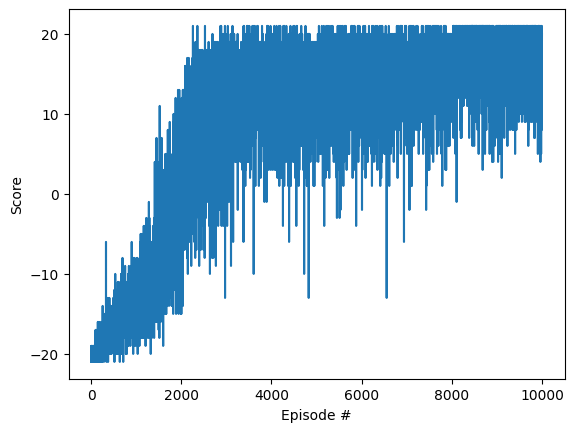

In [4]:
def dqn(n_episodes=10000, max_t=5000, eps_start=1.0, eps_end=0.0075, eps_decay=0.9987):
    """
    Trains the DQN agent using explerience replay.

    @param n_episodes Number of episodes simulated for the training.
    @param max_t Maximum number of stemps for each episode.
    @param eps_start Initial probability to select a random action.
    @þaram eps_end Minimum of the probability to select a random action.
    @param eps_decay Decay factor of the probability to select a random action.

    @return List of rewards.

    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), "./saved_models/checkpoint_" + str(i_episode) + ".pt")
            np.save("./saved_models/scores_" +  str(i_episode) +  ".npy", np.array(scores))
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()